# Assignment 1 - Build a Bayesian network in pyAgrum
In this assignment, part of the Bayesian Reasoning and Learning course of the master Artificial Intelligence of the Open Universiteit, I will be building a Bayesian network (BN) in pyAgrum. As I have been active in athletics since I was about 7 years old, I was curious as to how BNs are applicable in that domain. In this assignment I will therefore be investigating the possibilities of using BNs to predict sport injuries.

In [1]:
!pip install pyagrum

In [2]:
import pyagrum as gum
import pyagrum.lib.notebook as gnb

## Creating the BN
First I will create the BN, including all arcs and CPTs.

In [3]:
bn = gum.BayesNet('SportInjury')

In [4]:
# Create nodes
bn.add(gum.LabelizedVariable('Injury', 'Injury', ['Yes', 'No']))
bn.add(gum.LabelizedVariable('Age', 'Age', ['< 12', '12-20', '20-35', '> 35']))
bn.add(gum.LabelizedVariable('Training intensity', 'Training type', ['High', 'Low']))
bn.add(gum.LabelizedVariable('Training frequency', 'Training frequency', ['<= 3 per week', '> 3 per week']))
bn.add(gum.LabelizedVariable('Too much training causing exhaustion', 'Too much training causing exhaustion', ['Yes', 'No'])) # Hidden node for the noisy OR
bn.add(gum.LabelizedVariable('Required recovery time', 'Required recovery time', ['Short', 'Long']))
bn.add(gum.LabelizedVariable('Sleep quality', 'Sleep quality', ['Good', 'Poor']))
bn.add(gum.LabelizedVariable('Sleep quality causing exhaustion', 'Sleep quality causing exhaustion', ['Yes', 'No'])) # Hidden node for the noisy OR
bn.add(gum.LabelizedVariable('Exhaustion', 'Exhaustion', ['Yes', 'No'])) # Will be a noisy OR
bn.add(gum.LabelizedVariable('Too much training', 'Too much training', ['Yes', 'No'])) # Will be a noisy AND

9

In [5]:
# Add arcs
arcs = [
    ('Age', 'Injury'),
    ('Age', 'Required recovery time'),
    ('Training intensity', 'Injury'),
    ('Training intensity', 'Required recovery time'),
    ('Training frequency', 'Too much training'),
    ('Required recovery time', 'Too much training'),
    ('Sleep quality', 'Sleep quality causing exhaustion'),
    ('Too much training', 'Too much training causing exhaustion'),
    ('Sleep quality causing exhaustion', 'Exhaustion'),
    ('Too much training causing exhaustion', 'Exhaustion'),
    ('Exhaustion', 'Injury')
]

for arc in arcs:
    bn.addArc(*arc)

bn

(pyagrum.BayesNet@000002153854C3F0) BN{nodes: 10, arcs: 11, domainSize: 2048, dim: 42, mem: 656o}

In [6]:
# Fill the conditional probability tables (CPTs)
bn.cpt('Age')[:] = [0.45, 0.45, 0.05, 0.05]
bn.cpt('Training intensity')[:] = [0.2, 0.8]
bn.cpt('Training frequency')[:] = [0.85, 0.15]
bn.cpt('Sleep quality')[:] = [0.8, 0.2]

# Required recovery time is a conditional probability table based on age and training intensity
bn.cpt('Required recovery time')[{'Age': '< 12', 'Training intensity': 'Low'}] = [0.95, 0.05]
bn.cpt('Required recovery time')[{'Age': '< 12', 'Training intensity': 'High'}] = [0.8, 0.2]
bn.cpt('Required recovery time')[{'Age': '12-20', 'Training intensity': 'Low'}] = [0.9, 0.1]
bn.cpt('Required recovery time')[{'Age': '12-20', 'Training intensity': 'High'}] = [0.75, 0.25]
bn.cpt('Required recovery time')[{'Age': '20-35', 'Training intensity': 'Low'}] = [0.85, 0.15]
bn.cpt('Required recovery time')[{'Age': '20-35', 'Training intensity': 'High'}] = [0.7, 0.3]
bn.cpt('Required recovery time')[{'Age': '> 35', 'Training intensity': 'Low'}] = [0.75, 0.25]
bn.cpt('Required recovery time')[{'Age': '> 35', 'Training intensity': 'High'}] = [0.6, 0.4]

# Too much training is a noisy AND of training frequency and required recovery time
bn.cpt('Too much training')[{'Training frequency': '<= 3 per week', 'Required recovery time': 'Short'}] = [0.05, 0.95]
bn.cpt('Too much training')[{'Training frequency': '<= 3 per week', 'Required recovery time': 'Long'}] = [0.05, 0.95]
bn.cpt('Too much training')[{'Training frequency': '> 3 per week', 'Required recovery time': 'Short'}] = [0.05, 0.95]
bn.cpt('Too much training')[{'Training frequency': '> 3 per week', 'Required recovery time': 'Long'}] = [0.95, 0.05]

# Exhaustion is a noisy OR of sleep quality and too much training
bn.cpt('Exhaustion')[{'Sleep quality causing exhaustion': 'Yes', 'Too much training causing exhaustion': 'Yes'}] = [1.0, 0.0]
bn.cpt('Exhaustion')[{'Sleep quality causing exhaustion': 'Yes', 'Too much training causing exhaustion': 'No'}] = [1.0, 0.0]
bn.cpt('Exhaustion')[{'Sleep quality causing exhaustion': 'No', 'Too much training causing exhaustion': 'Yes'}] = [1.0, 0.0]
bn.cpt('Exhaustion')[{'Sleep quality causing exhaustion': 'No', 'Too much training causing exhaustion': 'No'}] = [0.0, 1.0]
# Hidden nodes for the noisy OR
bn.cpt('Sleep quality causing exhaustion')[{'Sleep quality': 'Good'}] = [0.05, 0.95] 
bn.cpt('Sleep quality causing exhaustion')[{'Sleep quality': 'Poor'}] = [0.95, 0.05]
bn.cpt('Too much training causing exhaustion')[{'Too much training': 'Yes'}] = [0.95, 0.05]
bn.cpt('Too much training causing exhaustion')[{'Too much training': 'No'}] = [0.05, 0.95]

# Injury is a combination of age, training intensity and exhaustion
bn.cpt('Injury')[{'Age': '< 12', 'Training intensity': 'Low', 'Exhaustion': 'No'}] = [0.03, 0.97]
bn.cpt('Injury')[{'Age': '< 12', 'Training intensity': 'Low', 'Exhaustion': 'Yes'}] = [0.10, 0.90]
bn.cpt('Injury')[{'Age': '< 12', 'Training intensity': 'High', 'Exhaustion': 'No'}] = [0.10, 0.90]
bn.cpt('Injury')[{'Age': '< 12', 'Training intensity': 'High', 'Exhaustion': 'Yes'}] = [0.30, 0.70]

bn.cpt('Injury')[{'Age': '12-20', 'Training intensity': 'Low', 'Exhaustion': 'No'}] = [0.05, 0.95]
bn.cpt('Injury')[{'Age': '12-20', 'Training intensity': 'Low', 'Exhaustion': 'Yes'}] = [0.20, 0.80]
bn.cpt('Injury')[{'Age': '12-20', 'Training intensity': 'High', 'Exhaustion': 'No'}] = [0.20, 0.80]
bn.cpt('Injury')[{'Age': '12-20', 'Training intensity': 'High', 'Exhaustion': 'Yes'}] = [0.40, 0.60]

bn.cpt('Injury')[{'Age': '20-35', 'Training intensity': 'Low', 'Exhaustion': 'No'}] = [0.10, 0.90]
bn.cpt('Injury')[{'Age': '20-35', 'Training intensity': 'Low', 'Exhaustion': 'Yes'}] = [0.25, 0.75]
bn.cpt('Injury')[{'Age': '20-35', 'Training intensity': 'High', 'Exhaustion': 'No'}] = [0.25, 0.75]
bn.cpt('Injury')[{'Age': '20-35', 'Training intensity': 'High', 'Exhaustion': 'Yes'}] = [0.45, 0.55]

bn.cpt('Injury')[{'Age': '> 35', 'Training intensity': 'Low', 'Exhaustion': 'No'}] = [0.15, 0.85]
bn.cpt('Injury')[{'Age': '> 35', 'Training intensity': 'Low', 'Exhaustion': 'Yes'}] = [0.35, 0.65]
bn.cpt('Injury')[{'Age': '> 35', 'Training intensity': 'High', 'Exhaustion': 'No'}] = [0.35, 0.65]
bn.cpt('Injury')[{'Age': '> 35', 'Training intensity': 'High', 'Exhaustion': 'Yes'}] = [0.55, 0.45]


In [7]:
for node in bn.nodes():
    gnb.sideBySide(bn.cpt(node))

## Inference
With the BN built, we can start looking at the priors and posteriors.

In [8]:
ie = gum.LazyPropagation(bn)

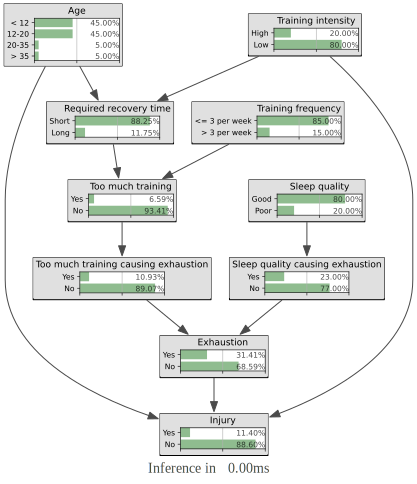

In [9]:
gnb.showInference(bn,evs={})

As an example, let's say we know a person is older than 35, is doing a low-intensity training, trains more than 3 times each week but has poor sleep. What is the probability of injury?

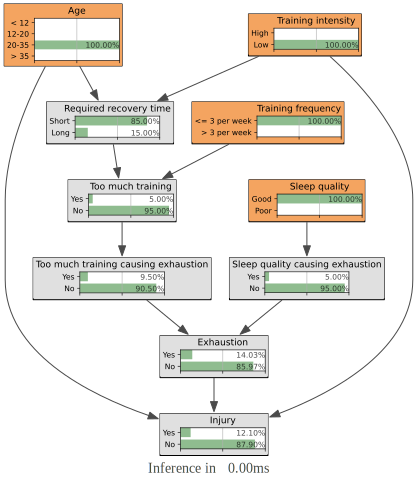

In [12]:
gnb.showInference(bn, evs={'Age': '20-35', 'Training intensity': 'Low', 'Training frequency': '<= 3 per week', 'Sleep quality': 'Good'})

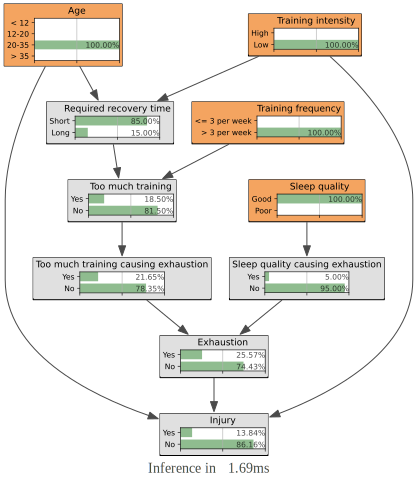

In [13]:
gnb.showInference(bn, evs={'Age': '20-35', 'Training intensity': 'Low', 'Training frequency': '> 3 per week', 'Sleep quality': 'Good'})